<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/Cars_baseline_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used car's price prediction

# Шаг 4: первые улучшения baseline-модели

## Описание задачи

Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?!  
Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!

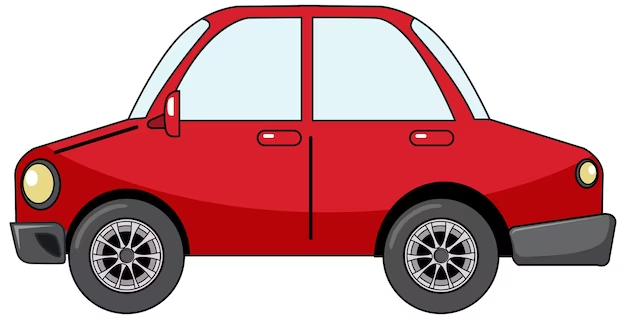

## Импорт библиотек, константы и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
RANDOM_STATE = 42

Будем работать с данными `train.csv`.

Когда финальная модель будет готова, с помощью нее предскажем цены на машины из файла `test.csv` (там ответов нет).

In [ ]:
!wget -O train.csv https://www.dropbox.com/s/qk4b79i7c078sxm/cars_train.csv
!wget -O test.csv https://www.dropbox.com/s/asf4b1z1yme5o7u/cars_test.csv

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.shape

(396212, 15)

Выделим целевую переменную `sellingprice` в отдельную переменную `y`, а `X` - матрица объект-признак.

In [ ]:
X = data.drop('sellingprice', axis=1)
y = data['sellingprice']

**Описание данных**

**_Признаки_**
- `year` - год производства
- `make` - производитель
- `model` - модель
- `trim` - модификация
- `body` - тип кузова
- `transmission` - тип КПП
- `vin` - идентификатор (вин)
- `state` - штат регистрации
- `condition` - состояние по шкале (1-5)
- `odometer` - пробег в милях
- `color` - цвет кузова
- `interior` - цвет интерьера
- `seller` - продавец
- `saledate` - дата продажи

**_Целевой признак_**
- `sellingprice` - стоимость продажи

In [ ]:
X.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2013,Dodge,Dart,Limited,Sedan,automatic,1c3cdfca5dd293552,mo,4.6,13957.0,gray,black,chrysler capital,Wed Jan 21 2015 02:30:00 GMT-0800 (PST)
1,2014,Honda,Civic,LX,Sedan,automatic,19xfb2f56ee228781,ca,5.0,2401.0,gray,black,"ahfc/honda lease trust/hvt, inc.",Thu Feb 26 2015 04:00:00 GMT-0800 (PST)
2,2012,Chevrolet,Traverse,LT,suv,automatic,1gnkrged3cj244704,wi,2.4,70046.0,white,black,capital one auto finance,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
3,2014,Nissan,Versa Note,1.6 SV,Hatchback,automatic,3n1ce2cp9el407766,fl,2.6,23415.0,gray,black,florida auto financial group,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
4,2014,Nissan,Versa,1.6 SV,sedan,automatic,3n1cn7ap4el813308,il,3.4,17040.0,blue,black,nissan motor acceptance corporation,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)


Посмотрим на типы колонок и число пропущенных значений в них.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396212 entries, 0 to 396211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          396212 non-null  int64  
 1   make          388993 non-null  object 
 2   model         388922 non-null  object 
 3   trim          388727 non-null  object 
 4   body          386883 non-null  object 
 5   transmission  350025 non-null  object 
 6   vin           396212 non-null  object 
 7   state         396212 non-null  object 
 8   condition     387759 non-null  float64
 9   odometer      396151 non-null  float64
 10  color         395679 non-null  object 
 11  interior      395679 non-null  object 
 12  seller        396212 non-null  object 
 13  saledate      396212 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 42.3+ MB


Посмотрим на числовые признаки

In [ ]:
X.describe()

,year,condition,odometer
count,396212.000000,387759.000000,396151.000000
mean,2010.041442,3.425687,68336.479029
std,3.977384,0.949871,53559.280598
min,1982.000000,1.000000,1.000000
25%,2007.000000,2.700000,28259.000000
50%,2012.000000,3.600000,52113.000000
75%,2013.000000,4.200000,99300.000000
max,2015.000000,5.000000,999999.000000


Посмотрим на категориальные признаки

In [ ]:
X.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,388993,388922,388727,386883,350025,396212,396212,395679,395679,396212,396212
unique,91,949,1899,83,2,396212,38,20,17,12530,3544
top,Ford,Altima,Base,Sedan,automatic,1c3cdfca5dd293552,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,66391,13969,39538,141921,337646,1,59164,78576,173230,14323,3783


Признак `vin` это уникальный идентификатор машины, поэтому удалим его.

In [ ]:
X.drop('vin', axis=1, inplace=True)

# Разведочный анализ данных

## Заполнение пропусков

Заполним пропуски в числовых столбцах средним значением, а в категориальных - пустой категорией

In [ ]:
for c in X.columns:
    if X[c].dtype == 'object':
          X[c].fillna("", inplace=True)

In [ ]:
for c in X.columns:
    if X[c].dtype != 'object':
          mean = np.mean(X[c])
          X[c].fillna(mean, inplace=True)

## Обработка категориальных признаков - 1

Посмотрим на количество значений в каждой категории

In [ ]:
for c in X.columns:
    if X[c].dtype == 'object':
          print(c, len(X[c].unique()))

make 92
model 950
trim 1900
body 84
transmission 3
state 38
color 21
interior 18
seller 12530
saledate 3544


В saledate очень много различных значений. Посмотрим почему.

In [ ]:
X[['year','saledate']]

,year,saledate
0,2013,Wed Jan 21 2015 02:30:00 GMT-0800 (PST)
1,2014,Thu Feb 26 2015 04:00:00 GMT-0800 (PST)
2,2012,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
3,2014,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
4,2014,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)
...,...,...
396207,2013,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
396208,2009,Mon Jun 08 2015 02:00:00 GMT-0700 (PDT)
396209,2004,Tue Jan 20 2015 02:30:00 GMT-0800 (PST)
396210,2013,Fri Dec 19 2014 11:45:00 GMT-0800 (PST)


Обработаем saledate:
* сделаем признак `car_age` - возраст машины в годах
* сделаем признак date - месяц+год продажи машины (категориальный)

Исходный признак `saledate` удалим

In [ ]:
X['car_age'] = X['saledate'].apply(lambda x: int(x.split(" ")[3])) - X['year']
X['date'] = X['saledate'].apply(lambda x: x.split(" ")[1]+x.split(" ")[3])

X.drop('saledate', axis=1, inplace=True)

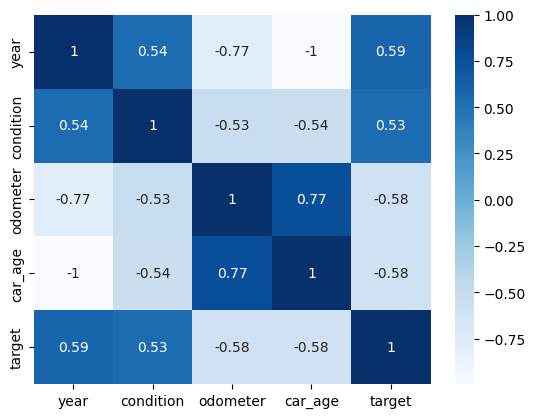

In [ ]:
import seaborn as sb

X['target'] = y

cols = X.columns[X.dtypes != 'object']

corr = X[cols].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

X.drop('target', axis=1, inplace=True)

Все числовые признаки важны, запомним это

Посмотрим на аналог корреляции категориальных признаков

In [ ]:
!pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3950 sha256=df40edbc3d323d145ee5704a978f7d5e1b9abe549d65d632f0bff13b7ce3a81b
  Stored in directory: /root/.cache/pip/wheels/49/ef/10/d93c981055c4fc0401028bc9dfda085ddd5ca204bcda0f2110
Successfully built association-metrics


In [ ]:
import association_metrics as am

XC = X.apply(
        lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(XC)

cramersv.fit()

,make,model,trim,body,transmission,state,color,interior,seller,date
make,1.000000,0.942073,0.768825,0.189035,0.161258,0.080016,0.085875,0.108237,0.405386,0.059136
model,0.942073,1.000000,0.552843,0.615147,0.310298,0.120689,0.145266,0.181734,0.287182,0.086036
trim,0.768825,0.552843,1.000000,0.437450,0.291284,0.131441,0.139243,0.210486,0.267798,0.099165
body,0.189035,0.615147,0.437450,1.000000,0.171188,0.054380,0.070882,0.073898,0.251710,0.298083
transmission,0.161258,0.310298,0.291284,0.171188,1.000000,0.377115,0.063472,0.066053,0.394181,0.031898
state,0.080016,0.120689,0.131441,0.054380,0.377115,1.000000,0.064536,0.062192,0.679166,0.081021
color,0.085875,0.145266,0.139243,0.070882,0.063472,0.064536,1.000000,0.259053,0.233966,0.018536
interior,0.108237,0.181734,0.210486,0.073898,0.066053,0.062192,0.259053,1.000000,0.258849,0.061795
seller,0.405386,0.287182,0.267798,0.251710,0.394181,0.679166,0.233966,0.258849,1.000000,0.286704
date,0.059136,0.086036,0.099165,0.298083,0.031898,0.081021,0.018536,0.061795,0.286704,1.000000


Признаки make и model сильно связаны, поэтому уберем make как менее информативный

In [ ]:
X.drop('make', axis=1, inplace=True)

Как посмотреть влияние категориального признака на целевую переменную? Здесь лучше всего поможет scatterplot

<Axes: ylabel='sellingprice'>

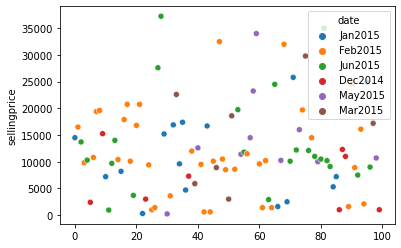

In [ ]:
import seaborn as sns

sns.scatterplot(data=X.iloc[:100], x=X.iloc[:100].index, y=y[:100], hue='date')

<Axes: ylabel='sellingprice'>

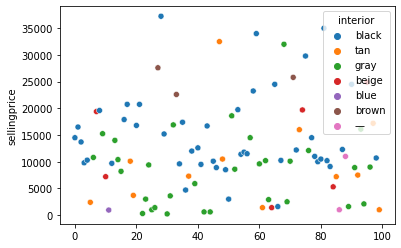

In [ ]:
sns.scatterplot(data=X.iloc[:100], x=X.iloc[:100].index, y=y[:100], hue='interior')

<Axes: ylabel='sellingprice'>

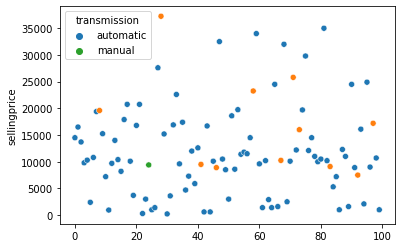

In [ ]:
sns.scatterplot(data=X.iloc[:100], x=X.iloc[:100].index, y=y[:100], hue='transmission')

Посмотрим на распределение целевой переменной

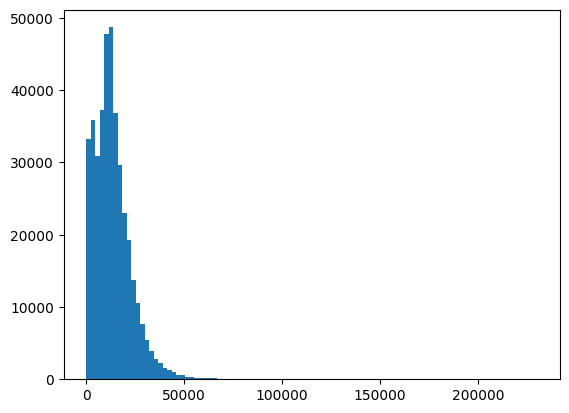

In [ ]:
plt.hist(y, bins=100);

Пока мы не будем ничего делать с этим распределением, но известно, что с распределениями, отличными от нормального, большинству моделей сложно работать.

Поэтому при улучшении качества базового решения мы преобразуем это распределение.

## Поиск аномальных значений

In [ ]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[X.dtypes != 'object']

year


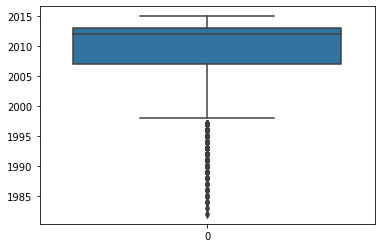

condition


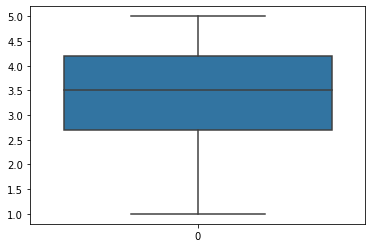

odometer


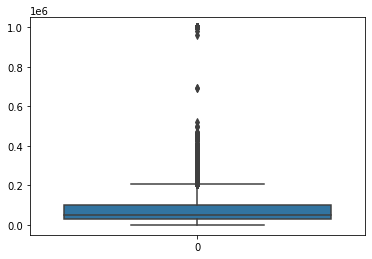

car_age


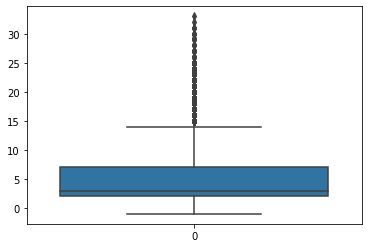

In [ ]:
for col in num_cols:
    print(col)
    sb.boxplot(X[col])
    plt.show()

In [ ]:
X[X['odometer'] > 800000][['car_age','odometer']]

,car_age,odometer
8651,8,999999.0
26775,8,999999.0
39643,8,999999.0
59125,8,999999.0
69969,9,999999.0
70028,10,999999.0
78649,9,999999.0
90539,14,999999.0
94884,2,999999.0
105833,8,999999.0


Выкинем машины младше 10 лет, проехавшие 1_000_000 миль - это почти точно выбросы.

In [ ]:
Xnew = X[~((X.car_age < 10) & (X.odometer > 800_000))]
ynew = y[~((X.car_age < 10) & (X.odometer > 800_000))]

Xnew.drop('car_age', axis=1, inplace=True)

<ipython-input-13-8b312c5c6373>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xnew.drop('car_age', axis=1, inplace=True)


## Построение baseline

Для baseline-модели мы сделаем следующее:
* закодируем категориальные признаки при помощи TargetEncoder
* масштабируем все признаки с помощью StandardScaler
* обучим линейную регрессию

In [ ]:
!pip install category_encoders -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.0 MB/s eta 0:00:00


In [ ]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

Разобъем данные на тренировочную и тестовую части

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.25, random_state=42)

Осуществим задуманные шаги

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


enc = TargetEncoder(cols=cat_cols)

enc.fit(X_train, y_train)
X_train_new = enc.transform(X_train)
X_test_new = enc.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = pd.DataFrame(scaler.transform(X_train_new), columns=X_train.columns)
X_test_new = pd.DataFrame(scaler.transform(X_test_new), columns=X_test.columns)

model = LinearRegression()
model.fit(X_train_new, y_train)
pred = model.predict(X_test_new)

Оценим качество полученной модели

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

MAPE(y_test, pred)

0.7151865211267128

Ошибка в среднем 71% от цены - модель пока не очень хорошая, есть куда улучшать!

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

p1 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

In [ ]:
p1.fit(X_train, y_train)

Pipeline(steps=[('encoder_',
                 TargetEncoder(cols=Index(['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior',
       'seller', 'date'],
      dtype='object'))),
                ('scaler_', StandardScaler()), ('model_', LinearRegression())])

In [ ]:
pred = p1.predict(X_test)

MAPE(y_test, pred)

0.7151865211267128

## Первые улучшения

В нашем пайплайне три шага:
* закодируем категориальные признаки при помощи TargetEncoder
* масштабируем все признаки с помощью StandardScaler
* обучим линейную регрессию

Как можно улучшить решение?

1) Можно подобрать гиперпараметры кодировщика в шаге 1, а также сам кодировщик

2) Можно использовать другой способ масштабирования данных

3) Можно использовать другую модель!

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# по умолчанию smoothing = 10

p2 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p3 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=100)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p4 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p5 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=10)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p6 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=100)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p7 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p8 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

In [ ]:
for i,p in enumerate([p1,p2,p3,p4,p5,p6,p7,p8]):
    p.fit(X_train, y_train)
    pred = p.predict(X_test)
    print(i+1, MAPE(y_test, pred))

1 0.7151865211267128
2 0.7207471981889987
3 0.7246917683308532
4 0.7207471981889991
5 0.7151865211267123
6 0.7246917683308514
7 0.7217788610751908
8 0.7217788610751883


Значительных улучшений нет.

Сменим теперь модель!

In [ ]:
p9 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p9.fit(X_train, y_train)
pred = p9.predict(X_test)
MAPE(y_test, pred)

0.2133142359031578

Уже гораздо лучше. Попробуем для RandomForest поменять кодировщик, его гиперпараметры и скалер.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

p10 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p11 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p12 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p13 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

In [ ]:
for i,p in enumerate([p9,p10,p11,p12,p13]):
    p.fit(X_train.iloc[:50000], y_train[:50000])
    pred = p.predict(X_test)
    print(i+9, MAPE(y_test, pred))

9 0.3197195980734761
10 1.9470735592499413
11 0.33855986272388816
12 1.946595745439739
13 0.34096552086439996


Посмотрим на важность признаков

In [ ]:
weights = pd.DataFrame(p9['model_'].feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
weights

,0
model,0.370741
odometer,0.359221
year,0.082082
trim,0.062638
seller,0.051751
body,0.022932
condition,0.021888
state,0.007978
color,0.006608
interior,0.006098
